In [2]:
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [3]:
pred_files = os.listdir("./output/csvs")

In [4]:
def qq_manual(model, dataset, s1, s2):
    plt.scatter(s1, s2)
    # sm.qqplot_2samples(s1, s2, line='s')
    plt.title("%s-%s"%(model, dataset))
    plt.xlabel('y')
    plt.ylabel('y_pred')
    # plt.title('QQ Plot of series1 vs series2')
    plt.grid(True)

[Errno 2] No such file or directory: './output/csvs/online_retail_explainable_boosting_train-exf.csv'


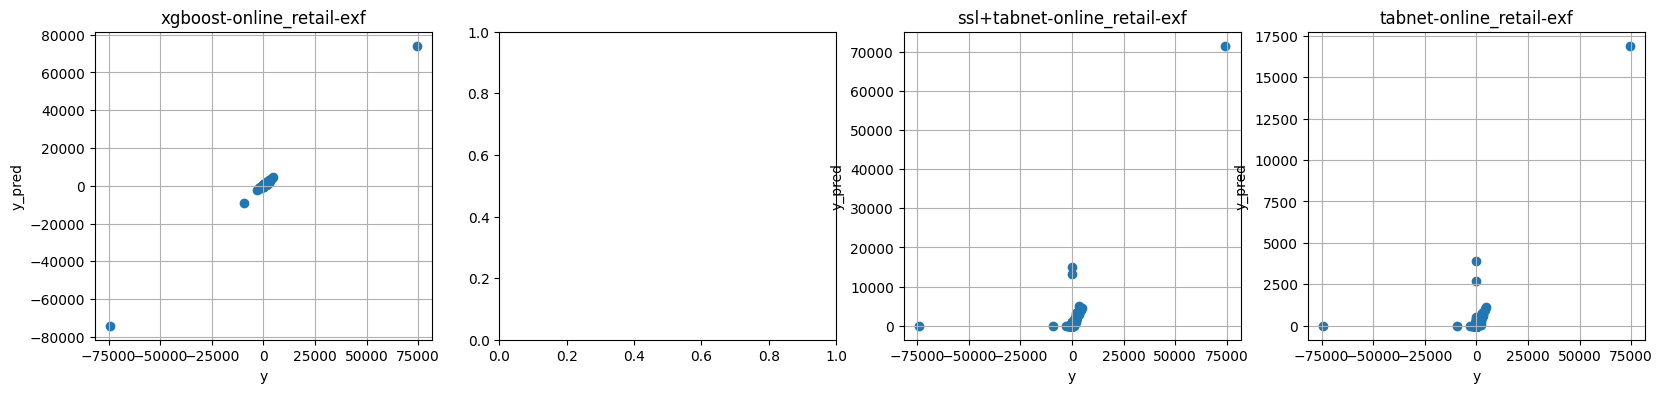

[Errno 2] No such file or directory: './output/csvs/online_retail_2_explainable_boosting_train-exf.csv'


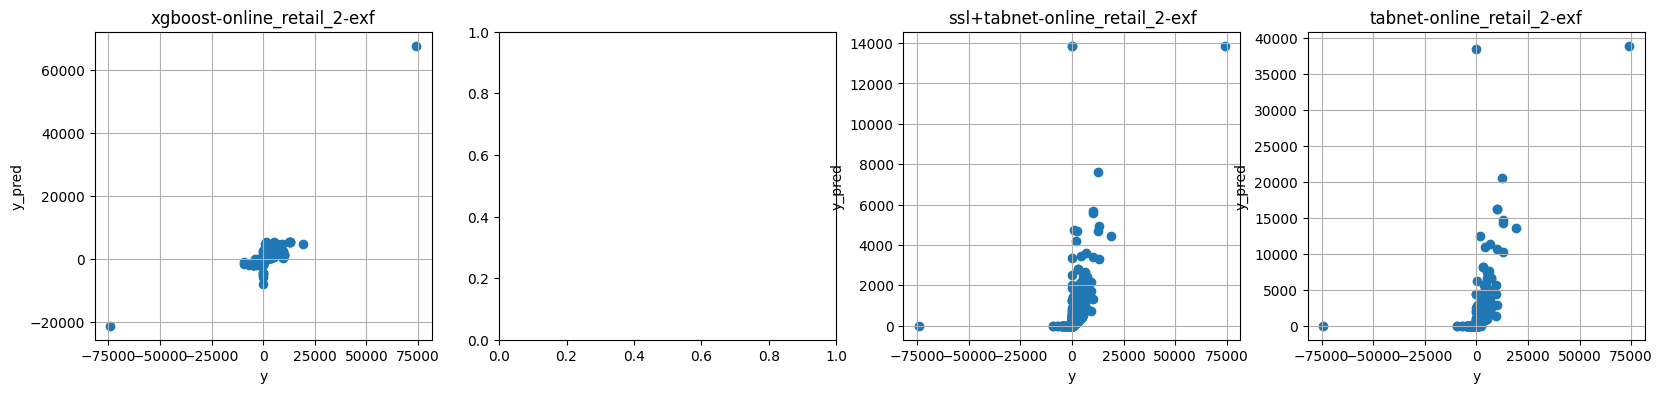

[Errno 2] No such file or directory: './output/csvs/product_demand_explainable_boosting_train-exf.csv'


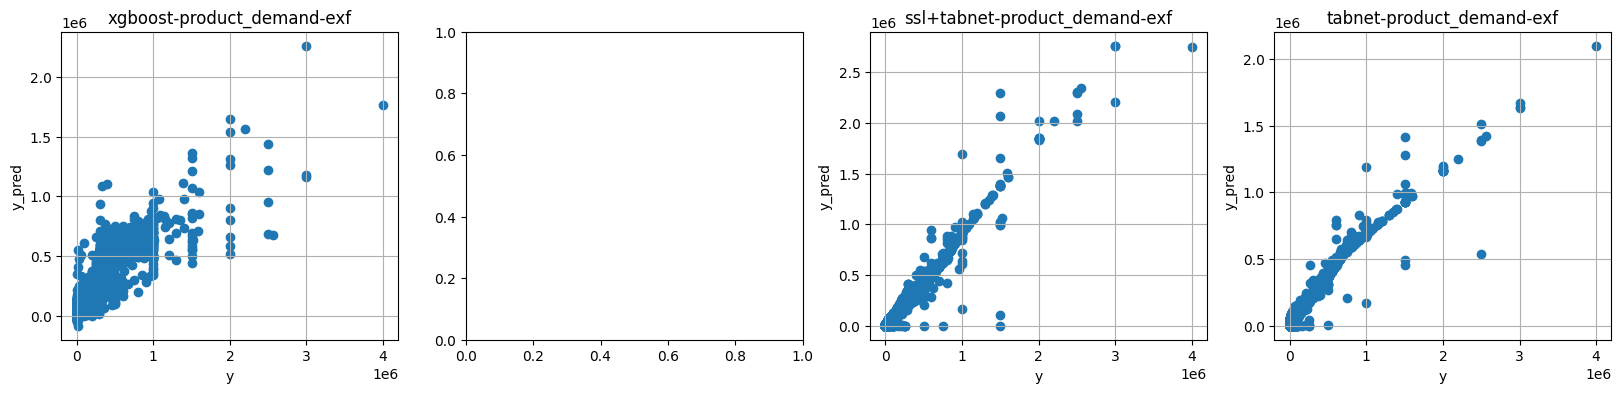

[Errno 2] No such file or directory: './output/csvs/future_sales_explainable_boosting_train-exf.csv'


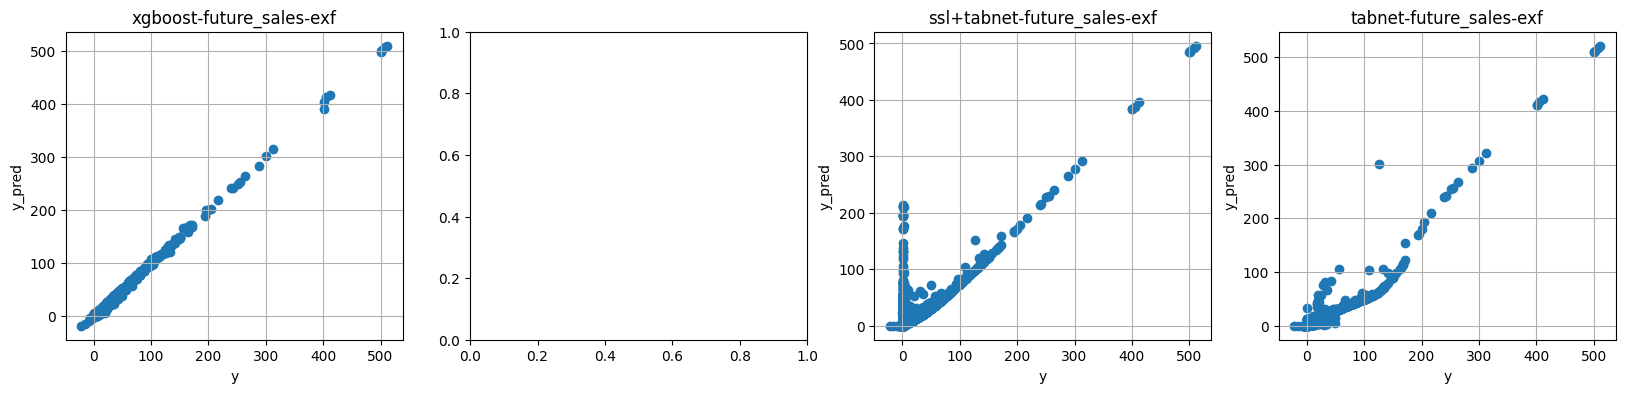

[Errno 2] No such file or directory: './output/csvs/livestock_meat_import_explainable_boosting_train-exf.csv'


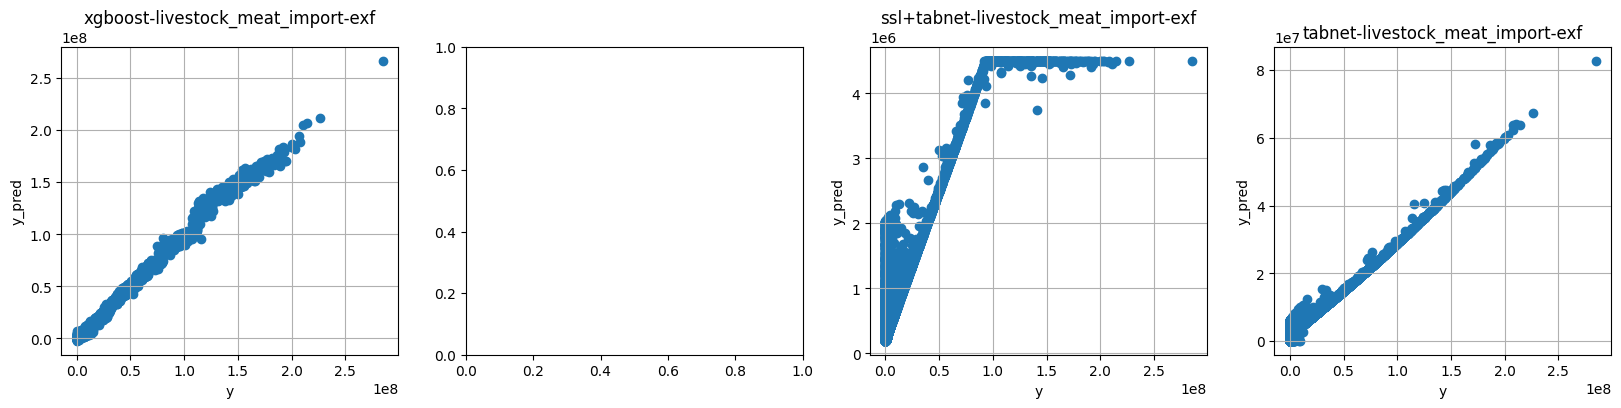

[Errno 2] No such file or directory: './output/csvs/online_retail_xgboost_train.csv'


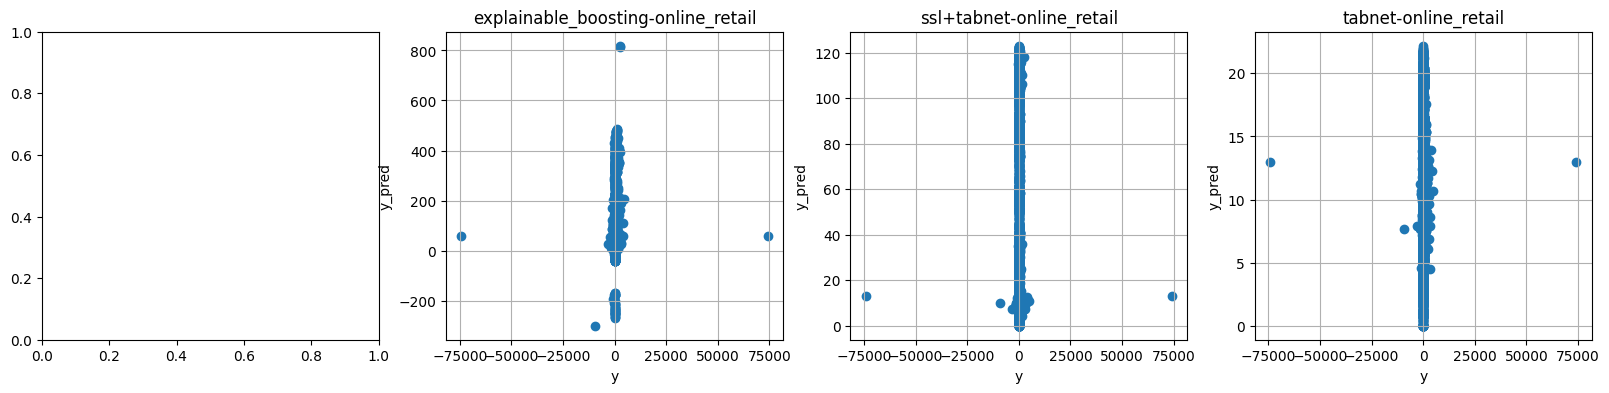

[Errno 2] No such file or directory: './output/csvs/online_retail_2_xgboost_train.csv'


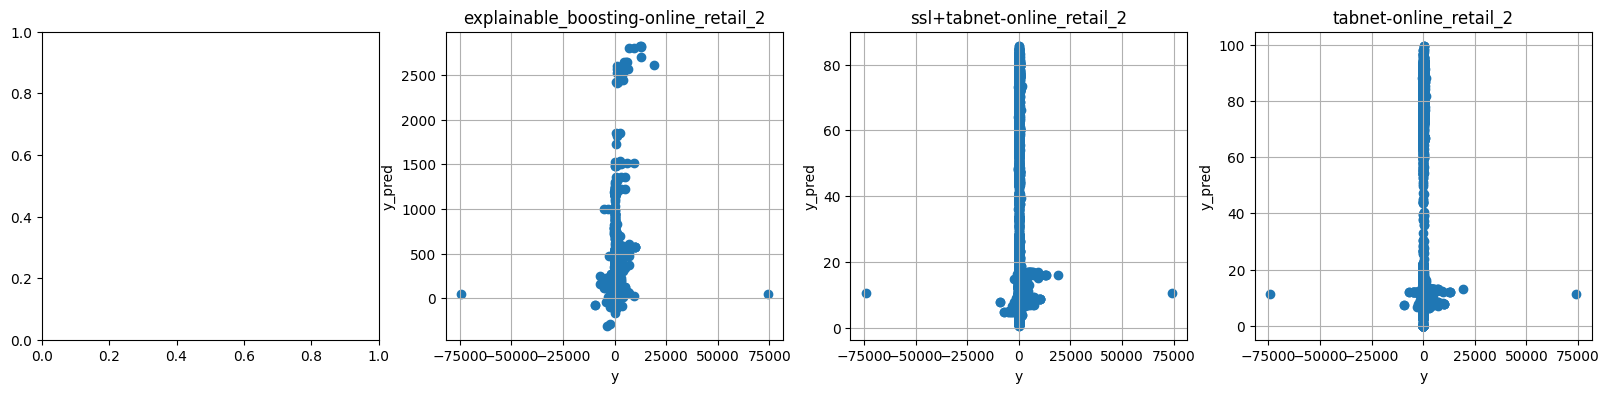

[Errno 2] No such file or directory: './output/csvs/product_demand_xgboost_train.csv'


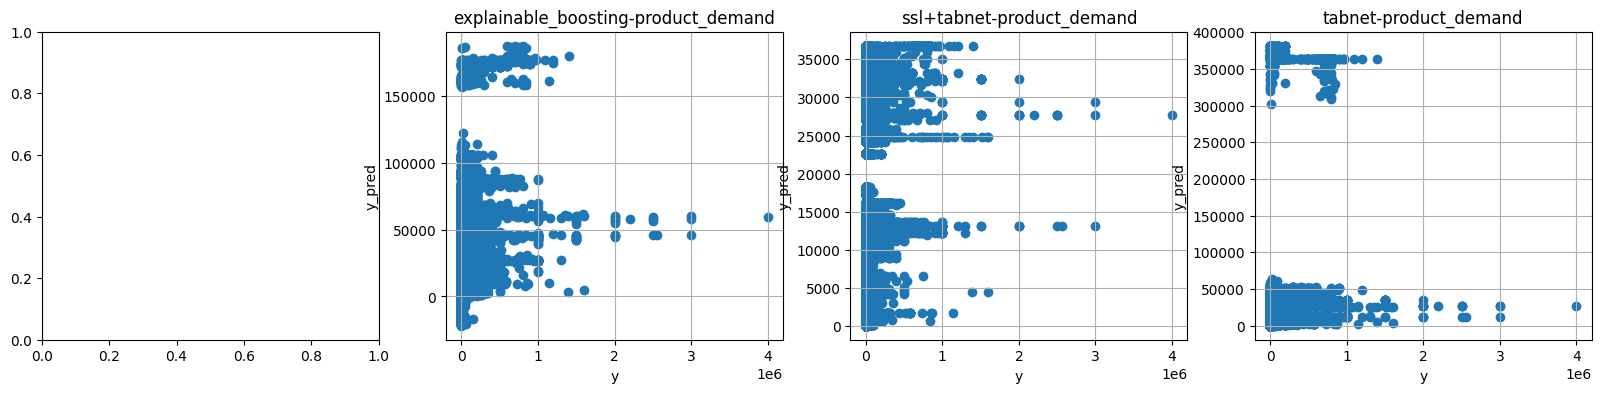

[Errno 2] No such file or directory: './output/csvs/future_sales_xgboost_train.csv'
[Errno 2] No such file or directory: './output/csvs/future_sales_explainable_boosting_train.csv'


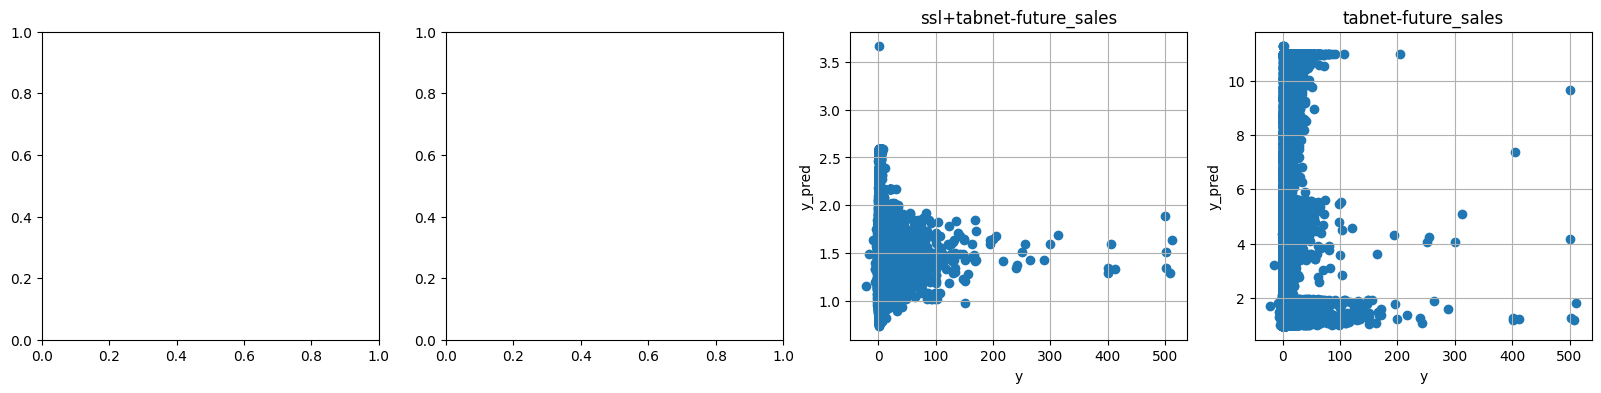

[Errno 2] No such file or directory: './output/csvs/livestock_meat_import_xgboost_train.csv'
[Errno 2] No such file or directory: './output/csvs/livestock_meat_import_explainable_boosting_train.csv'


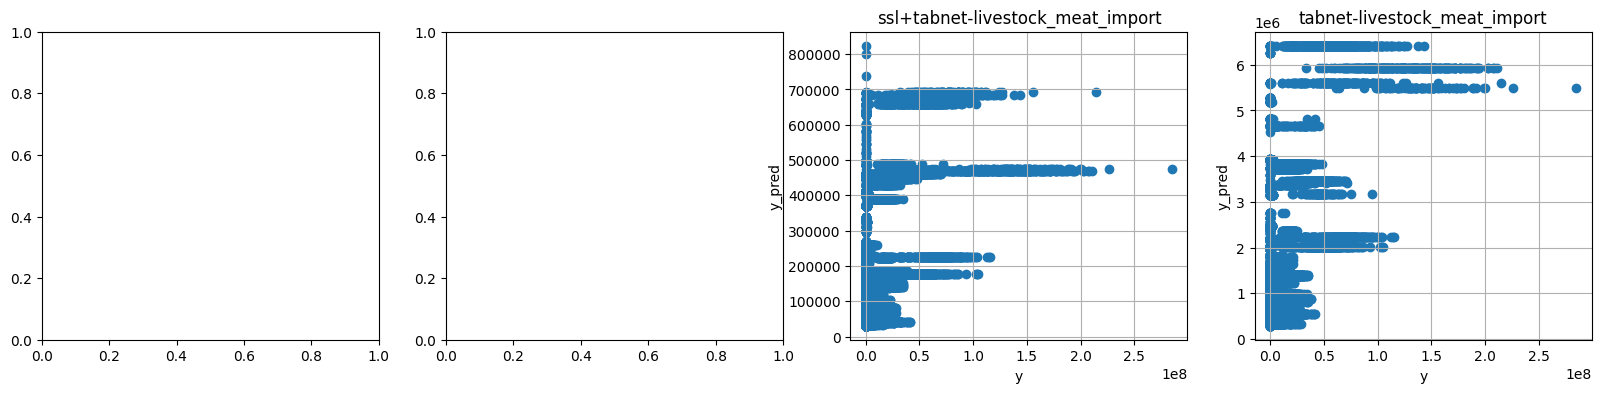

In [8]:
from tools.dataset import get_dataset
from tools.models import get_model_trainer
from tools.preprocess import timeseries_split

for is_extra_feature_enabled in [True, False]:
    extra_feat_txt = "-exf" if is_extra_feature_enabled else ""
    for dataset_name in ["online_retail", "online_retail_2", "product_demand", "future_sales", "livestock_meat_import"]:
        plt.figure(figsize=(20, 4))
        idx = 1
        for model_name in ["xgboost", "explainable_boosting", "ssl+tabnet", "tabnet"]:
            try:
                plt.subplot(1, 4, idx)
                idx+=1
                filename1 = f"./output/csvs/{dataset_name}_{model_name}_train{extra_feat_txt}.csv"
                filename2 = f"./output/csvs/{dataset_name}_{model_name}_test{extra_feat_txt}.csv"
                df_train = pd.read_csv(filename1)
                df_test = pd.read_csv(filename2)
                y_train, y_train_pred = df_train['y'], df_train['y_pred']
                y_test, y_test_pred = df_test['y'], df_test['y_pred']
                qq_manual(model_name, "%s%s"%(dataset_name, extra_feat_txt), y_train, y_train_pred)
            except Exception as e:
                print(e)
        plt.show()
            

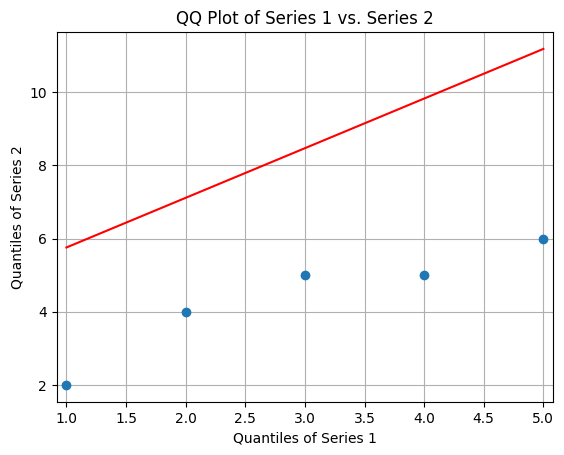

In [7]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create your pandas Series (replace with your actual data)
series1 = pd.Series([1, 2, 3, 4, 5])
series2 = pd.Series([2, 4, 5, 5, 6])

# Use qqplot_2samples for the QQ plot
sm.qqplot_2samples(series1, series2, line='s')  # line='s' for reference line

# Customize the plot (optional)
plt.xlabel("Quantiles of Series 1")
plt.ylabel("Quantiles of Series 2")
plt.title("QQ Plot of Series 1 vs. Series 2")
plt.grid(True)
plt.show()